# Atividade 10
Implemetação de filtro de Borramento.

## Importando bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

from PIL import Image

%matplotlib inline

C:\Users\danil\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\danil\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\danil\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


## Funções

In [60]:
# Noise turbulence transform 
def H(img, a, b, T): ## y = v (N), x = u (M)
    N, M = img.shape
    Hs = np.zeros(img.shape, dtype='complex') 

    for u in range(M):
        for v in range(N):
            term = (u-M/2)*a + (v-N/2)*b
            if term == 0:
                Hs[v][u] = 1
            else:
                Hs[v][u] = T/(np.pi*term) * np.sin(np.pi*(term))*np.exp(-1j*np.pi*(term))
    return(Hs)
    

## Principal

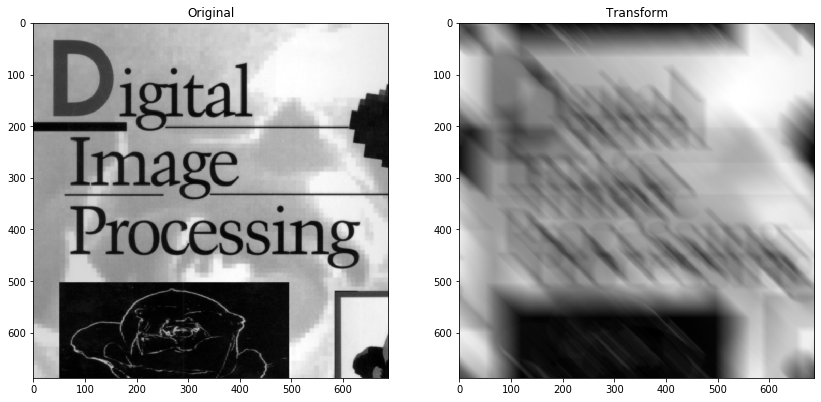

In [61]:
# read image
img = cv2.imread('test images/Book_original.tif', cv2.IMREAD_GRAYSCALE)

# applying FFT
signal_furier = np.fft.fft2(img)

# Shift signal
signal_shift = np.fft.fftshift(signal_furier)

Hs = H(img, 0.1, 0.1, 1)

signal_trans = np.multiply(signal_shift, Hs)

# shift back
ishift = np.fft.ifftshift(signal_trans)

# inverse furier
img_trans = abs(np.fft.ifft2(ishift))

fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(14)

fig.add_subplot(1,2,1, title='Original')
plt.imshow(img, cmap='gray')

fig.add_subplot(1,2,2, title='Transform')
plt.imshow(img_trans, cmap='gray')

In [48]:
signal_shift.shape

(688, 688)